                                                                                              Francesca and Hilal
                                                                                                MidTerm Project
# Diamonds Analysis
                                                                                              

#### The data is scrapped from Australian Diamond Importers website on 24th Feb 2022. It includes diamond features, like shape, size, colour, cut, clarity, and other features and the price in Australian dollars (excluding GST).
#### The data is a good candidate for regression models to predict the price based on diamond features.



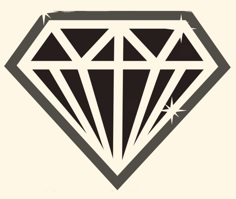


#### Data description
-  price: min:200 AUD; max:1.449.881 AUD.
-  shape: Princess, Cushion, Heart, Pear, Oval, Marquise, Emerald, Radiant, Cushion Modified, Asscher, Round. 
-  cut: Fair, Good, Very Good, Excellent, Ideal.
-  color: M (worst), L, K J, I, H, G, F, E, D (best).
-  fluor intensity: None, Faint, Very Slight, Slight, Medium, Strong, Very Strong.
-  clarity: I3 (worst), I2, I1, SI3, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best).
-  symmetry: Very Good, Excellent, Good, Fair, Poor.
-  polish: Very Good, Excellent, Good, Fair, Poor.
-  girdle min: XTN (Extremely Thin), VTN, TN, STN, M, STK, TK, VTK, XTK (Extremely Thick).
-  girdle max: XTN (Extremely Thin), VTN, TN, STN, M, STK, TK, VTK, XTK (Extremely Thick).
-  culet size: N (Nano), VS, S, M, SL, L, VL, EL (Extremely Large).
-  depth percentage: min: 0.0; max: 98.7.
-  table percentage: min: 0.0; max: 94.0.
-  size:  min: 0.80 mm; max: 19.35 mm.
-  length: 0.00 mm; max: 93.66 mm.
-  width: 0.00 mm; max: 62.3 mm.
-  depth: 0.00 mm; max: 76.3 mm.
-  data size: 26.6 Mb; 219704 rows; 27 columns: float64(6), int64(2), object(19).







## Table of Content

##### Modeling project based on analyzing diamonds by their cut, color, clarity, price, and other attributes.

                                                                                              
#### GOALS
- Diamonds dataset exploration, cleaning and editing.
- Linear Regression modeling on diamonds properties to predict the prices.
- Data visualization

#### DATA ANALYSIS STEPS
#### Exploration, Cleaning, Editing
- Read and Open the dataset file
- Check the data info
- Standardizing the column names
- Dropping the less important information (columns)
- Rearranging columns
- Data Subsetting
- Statistical summary of numerical columns
- Removing Duplicates
- Identify percentage of null values per column
- Dropping columns which contain more than 75% null values
- Removing Outliers
- Separate categorical and numerical data to check correlations
- Plotting the Histograms of Numerical Values
- Heatmaps to check correlations between numerical values
- Data BoxPlotting
- Getting dummys from categorical values and drop the first column

#### Modelling
- Split the Numerical Data in X and y, train and test sets
- Standardize the numerical values
- Transforming the arrays resulting from the standardization in DataFrames
- Split the Categorical-Dummy values in train and test sets
- Concatenate numerical and categorical X sets
- Modeling using Statsmodels
- Modeling using Scikit Learn
- Making scatter plots of Residuals
- Seaborn Residual plot
- Calculating MSE and MAE
- Features importance


#### DATA VISUALIZATION
- Transfer data on Tableau for visual analysis.




### Importing the Libraries in Python

In [2793]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd





### Read and Open the dataset file

In [2794]:
diamonds=pd.read_csv('diamonds.csv')
diamonds

,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,M,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
1,131704776,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
2,131584417,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,TN,M,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
3,131584416,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,STK,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
4,131613644,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,135619262,Round,10.65,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,M,STK,N,NaN,NaN,None,GIA,1210692,NaN,2022-02-24
219700,135122237,Radiant,5.17,NaN,Green,NaN,None,Fancy Light,VS2,NaN,...,TK,XTK,NaN,NaN,NaN,None,GIA,1292500,NaN,2022-02-24
219701,135553116,Round,18.07,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,TN,M,N,NaN,NaN,None,GIA,1315496,NaN,2022-02-24
219702,114752541,Princess,0.90,NaN,Red,NaN,NaN,Fancy,SI2,NaN,...,XTN,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN,2022-02-24


#### Check the data info

In [2795]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219704 entries, 0 to 219703
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   diamond_id                   219704 non-null  int64  
 1   shape                        219704 non-null  object 
 2   size                         219704 non-null  float64
 3   color                        210542 non-null  object 
 4   fancy_color_dominant_color   9164 non-null    object 
 5   fancy_color_secondary_color  1062 non-null    object 
 6   fancy_color_overtone         2038 non-null    object 
 7   fancy_color_intensity        9162 non-null    object 
 8   clarity                      219704 non-null  object 
 9   cut                          159097 non-null  object 
 10  symmetry                     219704 non-null  object 
 11  polish                       219704 non-null  object 
 12  depth_percent                219704 non-null  float64
 13 

In [2796]:
diamonds['total_sales_price'].min()

200

In [2797]:
diamonds['total_sales_price'].max()

1449881

In [2798]:
diamonds['depth_percent'].max()

98.7

In [2799]:
diamonds['depth_percent'].min()

0.0

In [2800]:
diamonds['table_percent'].min()

0.0

In [2801]:
diamonds['table_percent'].max()

94.0

In [2802]:
diamonds['size'].max()

19.35

In [2803]:
diamonds['size'].min()

0.08

In [2804]:
diamonds['meas_length'].max()

93.66

In [2805]:
diamonds['meas_length'].min()

0.0

In [2806]:
diamonds['meas_width'].max()

62.3

In [2807]:
diamonds['meas_width'].min()

0.0

In [2808]:
diamonds['meas_depth'].max()

76.3

In [2809]:
diamonds['meas_depth'].min()

0.0

### Standardizing the column names

All the column names are standardized and we don't need to make any changes but for practical reasons we make shorter 2 column names.

In [2810]:
# method 1: 

diamonds.rename(columns={'fancy_color_dominant_color':'fancy_color_dominant', 'fancy_color_secondary_color':'fancy_color_secondary'}, inplace=True)
diamonds


,diamond_id,shape,size,color,fancy_color_dominant,fancy_color_secondary,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,M,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
1,131704776,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
2,131584417,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,TN,M,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
3,131584416,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,STK,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
4,131613644,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,135619262,Round,10.65,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,M,STK,N,NaN,NaN,None,GIA,1210692,NaN,2022-02-24
219700,135122237,Radiant,5.17,NaN,Green,NaN,None,Fancy Light,VS2,NaN,...,TK,XTK,NaN,NaN,NaN,None,GIA,1292500,NaN,2022-02-24
219701,135553116,Round,18.07,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,TN,M,N,NaN,NaN,None,GIA,1315496,NaN,2022-02-24
219702,114752541,Princess,0.90,NaN,Red,NaN,NaN,Fancy,SI2,NaN,...,XTN,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN,2022-02-24


In [2811]:
# method 2 with the function:

def rename_columns(diamonds):
    diamonds.rename(columns={'fancy_color_dominant_color':'fancy_color_dominant','fancy_color_secondary_color':'fancy_color_secondary'}, inplace=True )
    return diamonds
rename_columns(diamonds)


,diamond_id,shape,size,color,fancy_color_dominant,fancy_color_secondary,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,M,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
1,131704776,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
2,131584417,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,TN,M,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
3,131584416,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,STK,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
4,131613644,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,135619262,Round,10.65,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,M,STK,N,NaN,NaN,None,GIA,1210692,NaN,2022-02-24
219700,135122237,Radiant,5.17,NaN,Green,NaN,None,Fancy Light,VS2,NaN,...,TK,XTK,NaN,NaN,NaN,None,GIA,1292500,NaN,2022-02-24
219701,135553116,Round,18.07,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,TN,M,N,NaN,NaN,None,GIA,1315496,NaN,2022-02-24
219702,114752541,Princess,0.90,NaN,Red,NaN,NaN,Fancy,SI2,NaN,...,XTN,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN,2022-02-24


### Dropping the less important information (columns)

In [2812]:
# method 1:

# diamonds.drop(columns=['diamond_id', 'date'], inplace=True)
# diamonds

In [2813]:
# method 2 with the function:

def drop_columns(diamonds):
    diamonds.drop(columns=['diamond_id', 'date', 'lab'], inplace=True)
    return diamonds

drop_columns(diamonds)

,shape,size,color,fancy_color_dominant,fancy_color_secondary,fancy_color_overtone,fancy_color_intensity,clarity,cut,symmetry,...,meas_width,meas_depth,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,total_sales_price,eye_clean
0,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,Very Good,...,2.87,1.79,M,M,N,NaN,NaN,None,200,NaN
1,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,Very Good,...,2.89,1.78,STK,STK,N,NaN,NaN,None,200,NaN
2,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,Very Good,...,2.90,1.77,TN,M,NaN,NaN,NaN,None,200,NaN
3,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,Very Good,...,2.88,1.78,M,STK,NaN,NaN,NaN,None,200,NaN
4,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,Very Good,...,2.83,1.82,STK,STK,N,NaN,NaN,None,200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65,E,NaN,NaN,NaN,NaN,VS1,Excellent,Excellent,...,14.18,8.66,M,STK,N,NaN,NaN,None,1210692,NaN
219700,Radiant,5.17,NaN,Green,NaN,None,Fancy Light,VS2,NaN,Very Good,...,8.81,5.71,TK,XTK,NaN,NaN,NaN,None,1292500,NaN
219701,Round,18.07,E,NaN,NaN,NaN,NaN,VS1,Excellent,Excellent,...,17.10,10.20,TN,M,N,NaN,NaN,None,1315496,NaN
219702,Princess,0.90,NaN,Red,NaN,NaN,Fancy,SI2,NaN,Good,...,4.90,3.47,XTN,VTK,N,NaN,NaN,Faint,1350000,NaN


### Rearranging columns

In [2814]:
list(diamonds.columns)

['shape',
 'size',
 'color',
 'fancy_color_dominant',
 'fancy_color_secondary',
 'fancy_color_overtone',
 'fancy_color_intensity',
 'clarity',
 'cut',
 'symmetry',
 'polish',
 'depth_percent',
 'table_percent',
 'meas_length',
 'meas_width',
 'meas_depth',
 'girdle_min',
 'girdle_max',
 'culet_size',
 'culet_condition',
 'fluor_color',
 'fluor_intensity',
 'total_sales_price',
 'eye_clean']

In [2815]:
diamonds = diamonds[[
    'shape',
    'size',
    'clarity',
    'cut',
    'symmetry',
    'polish',
    'depth_percent',
    'table_percent',
    'meas_length',
    'meas_width',
    'meas_depth',
    'girdle_min',
    'girdle_max',
    'culet_size',
    'culet_condition',
    'eye_clean',
    'color',
    'fancy_color_dominant',
    'fancy_color_secondary',
    'fancy_color_overtone',
    'fancy_color_intensity',
    'fluor_color',
    'fluor_intensity',
    'total_sales_price',
 ]]

diamonds.head()

,shape,size,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,...,culet_condition,eye_clean,color,fancy_color_dominant,fancy_color_secondary,fancy_color_overtone,fancy_color_intensity,fluor_color,fluor_intensity,total_sales_price
0,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
1,Round,0.09,VVS2,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
2,Round,0.09,VVS2,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
3,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
4,Round,0.09,VVS2,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200


### Data Subsetting
##### Check if the content of the categorical columns contain different defined data. Return unique values.

In [2816]:
diamonds['shape'].unique()

array(['Round', 'Pear', 'Oval', 'Marquise', 'Princess', 'Emerald',
       'Heart', 'Cushion', 'Radiant', 'Cushion Modified', 'Asscher'],
      dtype=object)

In [2817]:
diamonds['cut'].unique()

array(['Excellent', 'Very Good', nan, 'Good', 'Fair', 'None', 'Ideal'],
      dtype=object)

In [2818]:
diamonds['clarity'].unique()

array(['VVS2', 'VVS1', 'I1', 'VS1', 'VS2', 'IF', 'SI2', 'I2', 'SI1',
       'SI3', 'I3'], dtype=object)

In [2819]:
diamonds['symmetry'].unique()

array(['Very Good', 'Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [2820]:
diamonds['polish'].unique()

array(['Very Good', 'Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [2821]:
diamonds['girdle_min'].unique()

array(['M', 'STK', 'TN', 'TK', nan, 'VTN', 'VTK', 'XTK', 'XTN', 'STN'],
      dtype=object)

In [2822]:
diamonds['girdle_max'].unique()

array(['M', 'STK', 'TK', nan, 'TN', 'VTK', 'XTK', 'XTN', 'VTN', 'STN'],
      dtype=object)

In [2823]:
diamonds['culet_condition'].unique()

array([nan, 'Abraded', 'Chipped', 'Pointed'], dtype=object)

In [2824]:
diamonds['culet_size'].unique()

array(['N', nan, 'S', 'M', 'VS', 'L', 'EL', 'SL', 'VL'], dtype=object)

In [2825]:
diamonds['eye_clean'].unique()

array([nan, 'Yes', 'E1', 'Borderline', 'No'], dtype=object)

In [2826]:
diamonds['color'].unique()

array(['E', 'F', 'L', 'D', 'J', 'I', 'G', 'H', 'M', 'K', nan],
      dtype=object)

In [2827]:
diamonds['fancy_color_dominant'].unique()

array([nan, 'Orange', 'Brown', 'Yellow', 'Pink', 'Black', 'Other', 'Gray',
       'Purple', 'Blue', 'Green', 'Chameleon', 'Red'], dtype=object)

In [2828]:
diamonds['fancy_color_secondary'].unique()

array([nan, 'Purple', 'Green', 'Yellow', 'Brown', 'Orange', 'Pink',
       'Gray', 'Blue', 'Violet', 'Red'], dtype=object)

In [2829]:
diamonds['fancy_color_overtone'].unique()

array([nan, 'None', 'Yellowish', 'Brownish', 'Pinkish', 'Greenish',
       'Orangey', 'Purplish', 'Grayish'], dtype=object)

In [2830]:
diamonds['fancy_color_intensity'].unique()

array([nan, 'Fancy', 'Very Light', 'Faint', 'Fancy Light', 'Light',
       'Fancy Deep', 'Fancy Intense', 'Fancy Dark', 'Fancy Vivid'],
      dtype=object)

In [2831]:
diamonds['fluor_color'].unique()

array([nan, 'Blue', 'Yellow', 'Green', 'White', 'Orange'], dtype=object)

In [2832]:
diamonds['fluor_intensity'].unique()

array(['None', 'Very Slight', 'Strong', 'Medium', 'Faint', 'Very Strong',
       nan, 'Slight'], dtype=object)

In [2833]:
# removing rows which contain 1-3 samples

diamonds = diamonds[diamonds['cut']!='Fair']
diamonds = diamonds[diamonds['cut']!='None']
diamonds = diamonds[diamonds['cut']!='Ideal']

diamonds

,shape,size,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,...,culet_condition,eye_clean,color,fancy_color_dominant,fancy_color_secondary,fancy_color_overtone,fancy_color_intensity,fluor_color,fluor_intensity,total_sales_price
0,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
1,Round,0.09,VVS2,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
2,Round,0.09,VVS2,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
3,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
4,Round,0.09,VVS2,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65,VS1,Excellent,Excellent,Excellent,61.3,58.0,14.06,14.18,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,1210692
219700,Radiant,5.17,VS2,NaN,Very Good,Very Good,64.8,65.0,11.55,8.81,...,NaN,NaN,NaN,Green,NaN,None,Fancy Light,NaN,None,1292500
219701,Round,18.07,VS1,Excellent,Excellent,Excellent,60.2,59.0,17.06,17.10,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,1315496
219702,Princess,0.90,SI2,NaN,Good,Good,70.8,72.0,5.22,4.90,...,NaN,NaN,NaN,Red,NaN,NaN,Fancy,NaN,Faint,1350000


In [2834]:
diamonds['fluor_intensity'].value_counts()

None           143488
Faint           38301
Medium          20705
Strong          13242
Very Slight      2728
Very Strong      1093
Slight             12
Name: fluor_intensity, dtype: int64

In [2835]:
diamonds['polish'].value_counts()

Excellent    175805
Very Good     42321
Good           1562
Fair              7
Poor              2
Name: polish, dtype: int64

In [2836]:
diamonds['culet_size'].value_counts()

N     131896
VS      1345
S        476
M        163
L         58
SL        14
EL         4
VL         4
Name: culet_size, dtype: int64

In [2837]:
diamonds['symmetry'].value_counts()

Excellent    131619
Very Good     83142
Good           4605
Fair            324
Poor              7
Name: symmetry, dtype: int64

In [2838]:
diamonds['clarity'].value_counts()

SI1     38627
VS2     38171
VS1     36955
SI2     31102
VVS2    28985
VVS1    27877
IF       9974
I1       6961
I2        944
I3         91
SI3        10
Name: clarity, dtype: int64

In [2839]:
diamonds['color'].value_counts()

E    33103
F    31566
D    30873
G    29184
H    26072
I    22364
J    16898
K    11750
L     5683
M     3047
Name: color, dtype: int64

In [2840]:
diamonds['shape'].value_counts()

Round               158311
Oval                 13857
Emerald              11090
Pear                  9860
Princess              7050
Radiant               5630
Heart                 4774
Cushion Modified      3984
Marquise              2916
Asscher               1696
Cushion                529
Name: shape, dtype: int64

In [2841]:
diamonds['cut'].value_counts()

Excellent    124861
Very Good     34201
Good             28
Name: cut, dtype: int64

In [2842]:
diamonds['girdle_max'].value_counts()

STK    70439
TK     25186
M      17977
VTK    12636
XTK     7646
TN      1362
VTN      111
XTN       34
STN       12
Name: girdle_max, dtype: int64

In [2843]:
diamonds['girdle_min'].value_counts()

M      74420
STK    26335
TN     16741
TK     10352
VTK     4471
XTK     1981
VTN     1650
XTN      292
STN       24
Name: girdle_min, dtype: int64

### Statistical summary of numerical columns

In [2844]:
diamonds.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
size,219697.0,0.76,0.85,0.08,0.31,0.50,1.00,19.35
depth_percent,219697.0,61.68,9.92,0.00,61.20,62.40,63.50,98.70
table_percent,219697.0,57.75,9.96,0.00,57.00,58.00,60.00,94.00
meas_length,219697.0,5.55,1.76,0.00,4.35,5.06,6.35,93.66
meas_width,219697.0,5.14,1.37,0.00,4.31,4.80,5.70,62.30
meas_depth,219697.0,3.29,2.05,0.00,2.68,3.03,3.63,76.30
total_sales_price,219697.0,6908.17,25959.84,200.00,958.00,1970.00,5207.00,1449881.00


### Removing Duplicates
##### removing duplicated rows

In [2845]:
diamonds = diamonds.drop_duplicates()
diamonds

,shape,size,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,...,culet_condition,eye_clean,color,fancy_color_dominant,fancy_color_secondary,fancy_color_overtone,fancy_color_intensity,fluor_color,fluor_intensity,total_sales_price
0,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
1,Round,0.09,VVS2,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
2,Round,0.09,VVS2,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
3,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
4,Round,0.09,VVS2,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65,VS1,Excellent,Excellent,Excellent,61.3,58.0,14.06,14.18,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,1210692
219700,Radiant,5.17,VS2,NaN,Very Good,Very Good,64.8,65.0,11.55,8.81,...,NaN,NaN,NaN,Green,NaN,None,Fancy Light,NaN,None,1292500
219701,Round,18.07,VS1,Excellent,Excellent,Excellent,60.2,59.0,17.06,17.10,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,1315496
219702,Princess,0.90,SI2,NaN,Good,Good,70.8,72.0,5.22,4.90,...,NaN,NaN,NaN,Red,NaN,NaN,Fancy,NaN,Faint,1350000


dropping columns with more null values -- analyst decides the threshold value

note: that the threshold values are usually higher percentages, for eg if 70% or more values in a column are missing, then its a good idea to drop those columns

### Identify percentage of null values per column

In [2846]:

nulls_df = pd.DataFrame(round(diamonds.isna().sum()/len(diamonds),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,shape,0.00
1,size,0.00
2,clarity,0.00
3,cut,27.92
4,symmetry,0.00
5,polish,0.00
6,depth_percent,0.00
7,table_percent,0.00
8,meas_length,0.00
9,meas_width,0.00


### Dropping columns which contain more than 75% null values

In [2847]:
columns_drop = nulls_df[nulls_df['percent_nulls']>75]['header_name']
print(columns_drop.values)

['culet_condition' 'fancy_color_dominant' 'fancy_color_secondary'
 'fancy_color_overtone' 'fancy_color_intensity' 'fluor_color']


In [2848]:
def drop_columns(diamonds):
    diamonds.drop(columns=['culet_condition', 'fancy_color_dominant', 'fancy_color_secondary', 'fancy_color_overtone', 'fancy_color_intensity', 'fluor_color'], inplace=True)
    return diamonds

drop_columns(diamonds)

/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_75561/2693652452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds.drop(columns=['culet_condition', 'fancy_color_dominant', 'fancy_color_secondary', 'fancy_color_overtone', 'fancy_color_intensity', 'fluor_color'], inplace=True)


,shape,size,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,culet_size,eye_clean,color,fluor_intensity,total_sales_price
0,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,N,NaN,E,None,200
1,Round,0.09,VVS2,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,N,NaN,E,None,200
2,Round,0.09,VVS2,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,NaN,NaN,E,None,200
3,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,NaN,NaN,E,None,200
4,Round,0.09,VVS2,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,N,NaN,E,None,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65,VS1,Excellent,Excellent,Excellent,61.3,58.0,14.06,14.18,8.66,M,STK,N,NaN,E,None,1210692
219700,Radiant,5.17,VS2,NaN,Very Good,Very Good,64.8,65.0,11.55,8.81,5.71,TK,XTK,NaN,NaN,NaN,None,1292500
219701,Round,18.07,VS1,Excellent,Excellent,Excellent,60.2,59.0,17.06,17.10,10.20,TN,M,N,NaN,E,None,1315496
219702,Princess,0.90,SI2,NaN,Good,Good,70.8,72.0,5.22,4.90,3.47,XTN,VTK,N,NaN,NaN,Faint,1350000


### Removing Outliers 

In [2849]:
Q2 = diamonds.quantile(0.25)
Q4 = diamonds.quantile(0.75)
IQR1 = Q4 - Q2

diamonds = diamonds[~((diamonds < (Q2 - 1.5 * IQR1)) |(diamonds > (Q4 + 1.5 * IQR1))).any(axis=1)]

diamonds

/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_75561/2035386957.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  diamonds = diamonds[~((diamonds < (Q2 - 1.5 * IQR1)) |(diamonds > (Q4 + 1.5 * IQR1))).any(axis=1)]


,shape,size,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,culet_size,eye_clean,color,fluor_intensity,total_sales_price
0,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,N,NaN,E,None,200
1,Round,0.09,VVS2,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,N,NaN,E,None,200
2,Round,0.09,VVS2,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,NaN,NaN,E,None,200
3,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,NaN,NaN,E,None,200
4,Round,0.09,VVS2,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,N,NaN,E,None,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193895,Round,1.51,SI2,Excellent,Excellent,Excellent,61.0,56.0,7.36,7.41,4.50,TN,M,N,NaN,I,Medium,11791
193896,Round,1.51,SI2,Excellent,Excellent,Excellent,61.0,60.0,7.41,7.44,4.53,M,STK,N,NaN,I,Faint,11791
193900,Round,1.51,SI2,Very Good,Excellent,Excellent,63.9,57.0,7.12,7.17,4.56,NaN,NaN,NaN,NaN,I,None,11791
193902,Round,1.08,VS2,Excellent,Excellent,Excellent,62.7,57.0,6.54,6.55,4.10,NaN,NaN,NaN,Yes,E,None,11791


### Separate categorical and numerical data to check correlations

In [2850]:
# select categorical values

diamonds_cat = diamonds.select_dtypes('object')
diamonds_cat

,shape,clarity,cut,symmetry,polish,girdle_min,girdle_max,culet_size,eye_clean,color,fluor_intensity
0,Round,VVS2,Excellent,Very Good,Very Good,M,M,N,NaN,E,None
1,Round,VVS2,Very Good,Very Good,Very Good,STK,STK,N,NaN,E,None
2,Round,VVS2,Excellent,Very Good,Very Good,TN,M,NaN,NaN,E,None
3,Round,VVS2,Excellent,Very Good,Very Good,M,STK,NaN,NaN,E,None
4,Round,VVS2,Very Good,Very Good,Excellent,STK,STK,N,NaN,E,None
...,...,...,...,...,...,...,...,...,...,...,...
193895,Round,SI2,Excellent,Excellent,Excellent,TN,M,N,NaN,I,Medium
193896,Round,SI2,Excellent,Excellent,Excellent,M,STK,N,NaN,I,Faint
193900,Round,SI2,Very Good,Excellent,Excellent,NaN,NaN,NaN,NaN,I,None
193902,Round,VS2,Excellent,Excellent,Excellent,NaN,NaN,NaN,Yes,E,None


In [2851]:
# select numerical values

# method 1:

diamonds_numerical = diamonds._get_numeric_data()
diamonds_numerical

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,0.09,62.7,59.0,2.85,2.87,1.79,200
1,0.09,61.9,59.0,2.84,2.89,1.78,200
2,0.09,61.1,59.0,2.88,2.90,1.77,200
3,0.09,62.0,59.0,2.86,2.88,1.78,200
4,0.09,64.9,58.5,2.79,2.83,1.82,200
...,...,...,...,...,...,...,...
193895,1.51,61.0,56.0,7.36,7.41,4.50,11791
193896,1.51,61.0,60.0,7.41,7.44,4.53,11791
193900,1.51,63.9,57.0,7.12,7.17,4.56,11791
193902,1.08,62.7,57.0,6.54,6.55,4.10,11791


In [2852]:
# method 2:

# diamonds_num = diamonds.select_dtypes('number')
# diamonds_num

### Plotting the Histograms of Numerical Values

<Figure size 432x288 with 0 Axes>

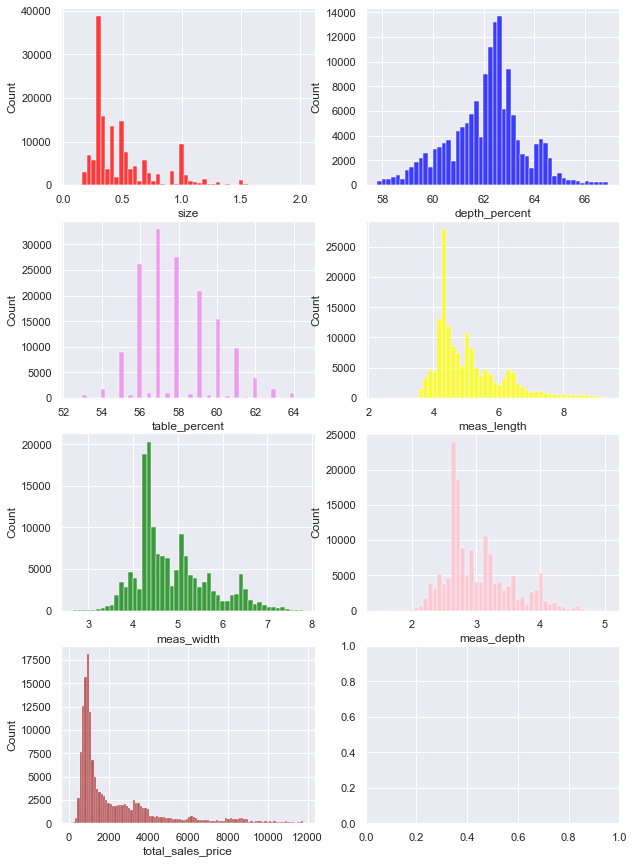

In [2853]:
plt.suptitle('seaborn all')

#displot did not work as subplots so we used histplots

fig, ax = plt.subplots(4,2,figsize = (10,15))
sns.histplot((diamonds_numerical['size']), color="red", bins=50, ax=ax[0,0])
sns.histplot((diamonds_numerical['depth_percent']), color="blue", bins=50,ax=ax[0,1])
sns.histplot((diamonds_numerical['table_percent']), color="violet", bins=50,ax=ax[1,0])
sns.histplot((diamonds_numerical['meas_length']), color="yellow", bins=50,ax=ax[1,1])
sns.histplot((diamonds_numerical['meas_width']), color="green", bins=50,ax=ax[2,0])
sns.histplot((diamonds_numerical['meas_depth']), color="pink", bins=50,ax=ax[2,1])
sns.histplot((diamonds_numerical['total_sales_price']), color="brown", bins=100,ax=ax[3,0])

sns.set(rc = {'figure.figsize':(15,8)})


### Heatmaps to check correlations between numerical values

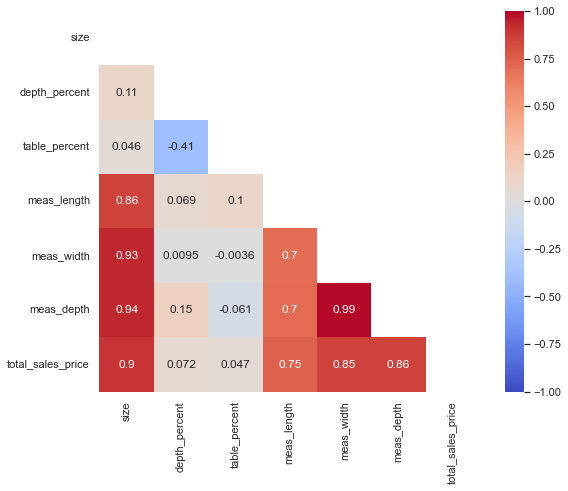

In [2854]:
corr = diamonds_numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [2855]:
# correlations values

diamonds_numerical.corr().round(2)

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
size,1.00,0.11,0.05,0.86,0.93,0.94,0.90
depth_percent,0.11,1.00,-0.41,0.07,0.01,0.15,0.07
table_percent,0.05,-0.41,1.00,0.10,-0.00,-0.06,0.05
meas_length,0.86,0.07,0.10,1.00,0.70,0.70,0.75
meas_width,0.93,0.01,-0.00,0.70,1.00,0.99,0.85
meas_depth,0.94,0.15,-0.06,0.70,0.99,1.00,0.86
total_sales_price,0.90,0.07,0.05,0.75,0.85,0.86,1.00


### Data BoxPlotting

#### Replacement of categorical to numerical values

In [2856]:
# copy the diamonds data frame
diamonds_replace_cat = diamonds.copy()

diamonds_replace_cat['clarity'].replace(['I3','I2','I1','SI3','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], [11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], inplace=True)
diamonds_replace_cat['color'].replace(['M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D'], [10, 9, 8, 7, 6, 5, 4, 3, 2, 1], inplace=True)
diamonds_replace_cat['fluor_intensity'].replace(['None','Faint', 'Very Slight', 'Slight', 'Medium', 'Strong', 'Very Strong'], [0, 1, 2, 3, 4, 5, 6], inplace=True)
diamonds_replace_cat['symmetry'].replace(['Excellent','Very Good','Good','Fair','Poor'], [1, 2, 3, 4, 5], inplace=True)
diamonds_replace_cat['polish'].replace(['Excellent','Very Good','Good','Fair', 'Poor'], [1, 2, 3, 4, 5], inplace=True)
diamonds_replace_cat['girdle_min'].replace(['XTN', 'VTN', 'TN', 'STN', 'M', 'STK', 'TK', 'VTK', 'XTK'], [1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)
diamonds_replace_cat['girdle_max'].replace(['XTN', 'VTN', 'TN', 'STN', 'M', 'STK', 'TK', 'VTK', 'XTK'], [1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)
diamonds_replace_cat['culet_size'].replace(['N','VS','S','M','SL','L','VL','EL'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
diamonds_replace_cat['shape'].replace(['Princess', 'Cushion', 'Heart', 'Pear', 'Oval', 'Marquise', 'Emerald', 'Radiant', 'Cushion Modified', 'Asscher', 'Round'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], inplace=True)
diamonds_replace_cat['cut'].replace(['Fair', 'Good', 'Very Good', 'Excellent', 'Ideal'], [5, 4, 3, 2, 1], inplace=True)


diamonds_replace_cat

,shape,size,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,culet_size,eye_clean,color,fluor_intensity,total_sales_price
0,11,0.09,3,2.0,2,2,62.7,59.0,2.85,2.87,1.79,5.0,5.0,1.0,NaN,2.0,0.0,200
1,11,0.09,3,3.0,2,2,61.9,59.0,2.84,2.89,1.78,6.0,6.0,1.0,NaN,2.0,0.0,200
2,11,0.09,3,2.0,2,2,61.1,59.0,2.88,2.90,1.77,3.0,5.0,NaN,NaN,2.0,0.0,200
3,11,0.09,3,2.0,2,2,62.0,59.0,2.86,2.88,1.78,5.0,6.0,NaN,NaN,2.0,0.0,200
4,11,0.09,3,3.0,2,1,64.9,58.5,2.79,2.83,1.82,6.0,6.0,1.0,NaN,2.0,0.0,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193895,11,1.51,7,2.0,1,1,61.0,56.0,7.36,7.41,4.50,3.0,5.0,1.0,NaN,6.0,4.0,11791
193896,11,1.51,7,2.0,1,1,61.0,60.0,7.41,7.44,4.53,5.0,6.0,1.0,NaN,6.0,1.0,11791
193900,11,1.51,7,3.0,1,1,63.9,57.0,7.12,7.17,4.56,NaN,NaN,NaN,NaN,6.0,0.0,11791
193902,11,1.08,5,2.0,1,1,62.7,57.0,6.54,6.55,4.10,NaN,NaN,NaN,Yes,2.0,0.0,11791


<AxesSubplot:xlabel='color', ylabel='total_sales_price'>

<Figure size 1080x576 with 0 Axes>

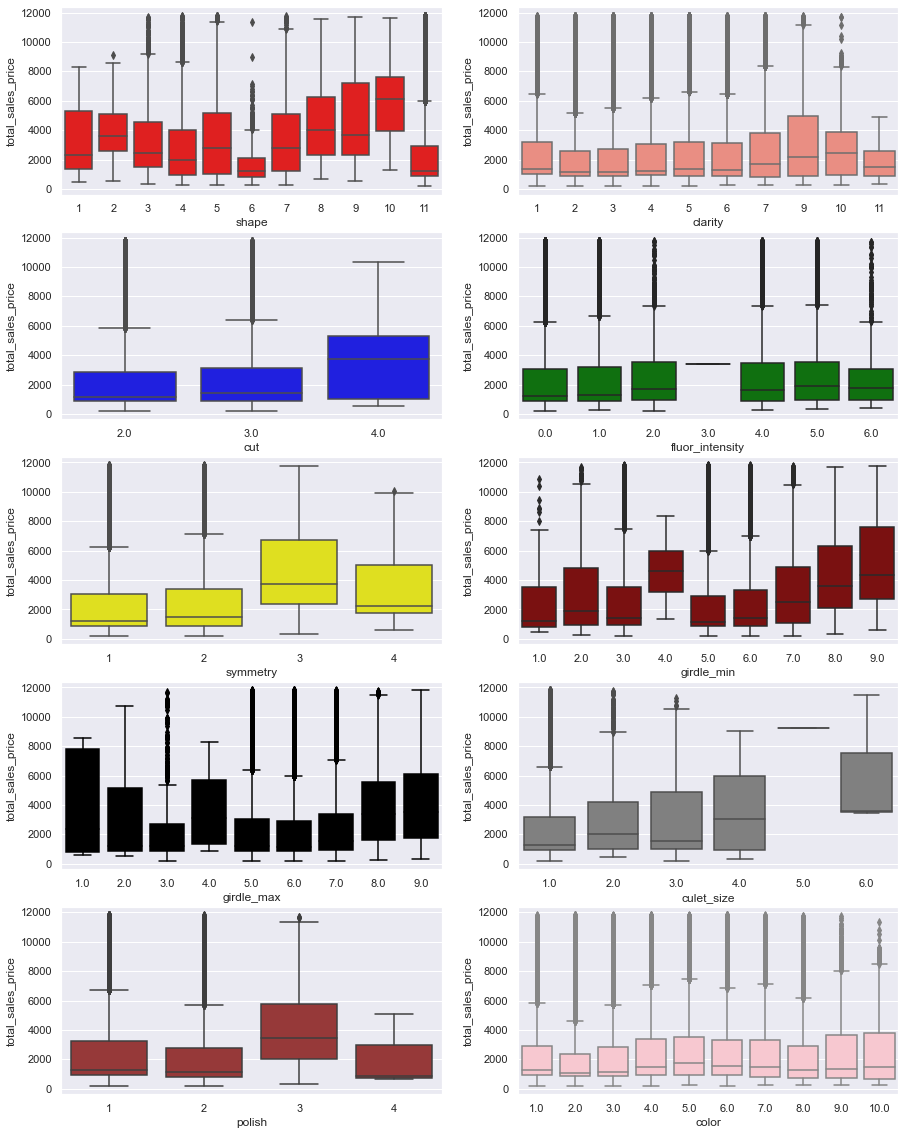

In [2857]:
plt.suptitle('all')


fig, ax = plt.subplots(5,2,figsize = (15,20))


sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['shape'], color="red", ax=ax[0,0])
sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['clarity'], color="salmon", ax=ax[0,1])
sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['cut'], color="blue", ax=ax[1,0])
sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['fluor_intensity'], color="green", ax=ax[1,1])
sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['symmetry'], color="yellow", ax=ax[2,0])
sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['girdle_min'], color="darkred", ax=ax[2,1])
sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['girdle_max'], color="black", ax=ax[3,0])
sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['culet_size'], color="grey", ax=ax[3,1])
sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['polish'], color="brown", ax=ax[4,0])
sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['color'], color="pink", ax=ax[4,1])



<Figure size 1080x576 with 0 Axes>

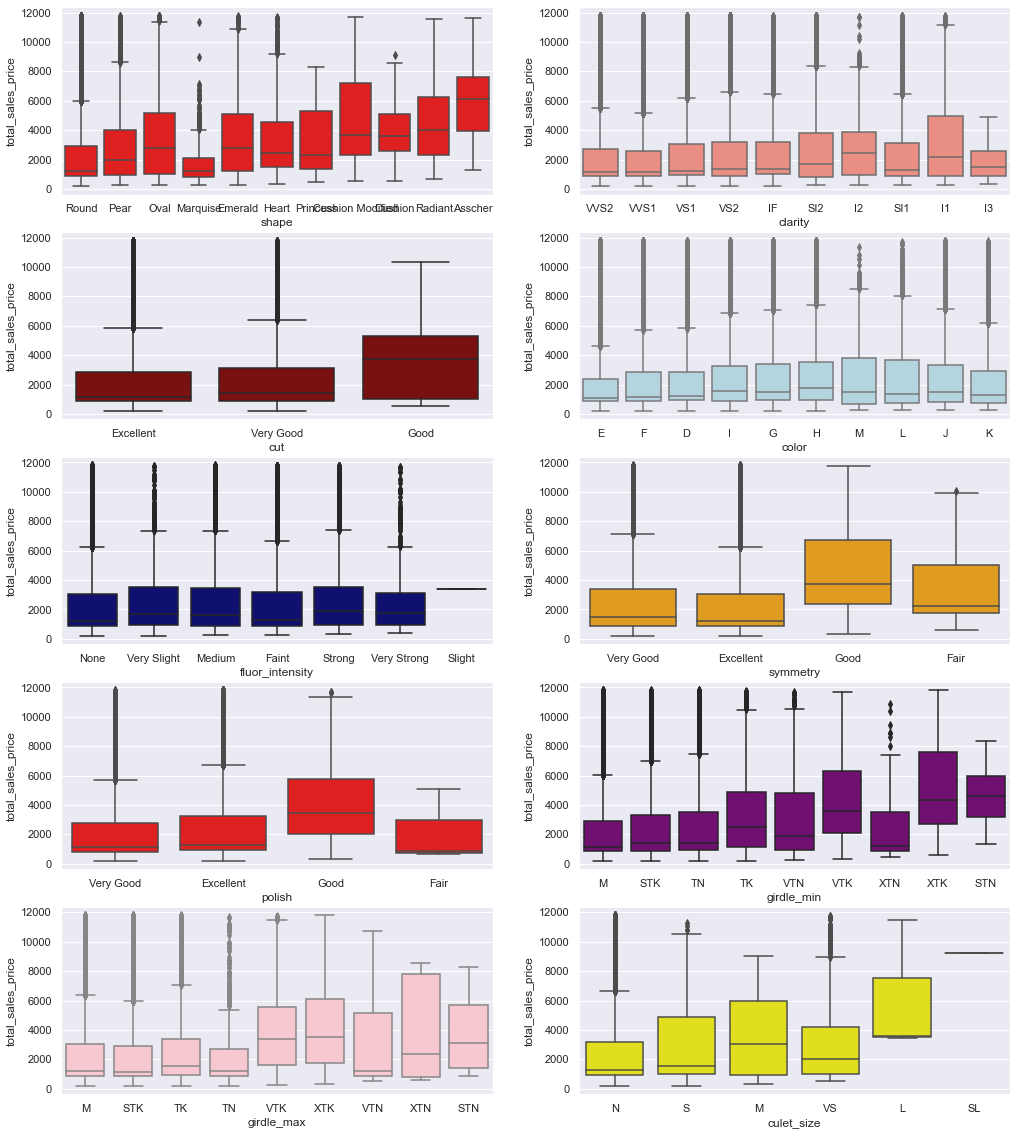

In [2858]:
# plots keeping categorical with original titles

plt.suptitle('seaborn all')


fig, ax = plt.subplots(5,2,figsize = (17,20))
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['shape'], color='red', ax=ax[0,0])
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['clarity'], color='salmon', ax=ax[0,1])
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['cut'], color='darkred', ax=ax[1,0])
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['color'], color='lightblue', ax=ax[1,1])
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['fluor_intensity'], color='navy', ax=ax[2,0])
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['symmetry'], color='orange', ax=ax[2,1])
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['polish'], color='red', ax=ax[3,0])
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['girdle_min'], color='purple', ax=ax[3,1])
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['girdle_max'], color='pink', ax=ax[4,0])
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['culet_size'], color='yellow', ax=ax[4,1])

plt.show()

### Getting dummys from categorical values and drop the first column

In [2859]:
# select categorical values

diamonds_cat = diamonds.select_dtypes('object')
diamonds_cat

,shape,clarity,cut,symmetry,polish,girdle_min,girdle_max,culet_size,eye_clean,color,fluor_intensity
0,Round,VVS2,Excellent,Very Good,Very Good,M,M,N,NaN,E,None
1,Round,VVS2,Very Good,Very Good,Very Good,STK,STK,N,NaN,E,None
2,Round,VVS2,Excellent,Very Good,Very Good,TN,M,NaN,NaN,E,None
3,Round,VVS2,Excellent,Very Good,Very Good,M,STK,NaN,NaN,E,None
4,Round,VVS2,Very Good,Very Good,Excellent,STK,STK,N,NaN,E,None
...,...,...,...,...,...,...,...,...,...,...,...
193895,Round,SI2,Excellent,Excellent,Excellent,TN,M,N,NaN,I,Medium
193896,Round,SI2,Excellent,Excellent,Excellent,M,STK,N,NaN,I,Faint
193900,Round,SI2,Very Good,Excellent,Excellent,NaN,NaN,NaN,NaN,I,None
193902,Round,VS2,Excellent,Excellent,Excellent,NaN,NaN,NaN,Yes,E,None


In [2860]:
# get the dummies and use drop_first=True to reduce the data volume dropping the first colums.

diamonds_dummy = pd.get_dummies(diamonds_cat, drop_first=True)
diamonds_dummy

,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,...,color_J,color_K,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193895,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
193896,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
193900,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
193902,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## Modelling

### Split the Numerical Data in X and y, train and test sets

In [2861]:
X_num = diamonds_numerical.drop('total_sales_price', axis=1)
y_num = diamonds_numerical.total_sales_price

X_num

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth
0,0.09,62.7,59.0,2.85,2.87,1.79
1,0.09,61.9,59.0,2.84,2.89,1.78
2,0.09,61.1,59.0,2.88,2.90,1.77
3,0.09,62.0,59.0,2.86,2.88,1.78
4,0.09,64.9,58.5,2.79,2.83,1.82
...,...,...,...,...,...,...
193895,1.51,61.0,56.0,7.36,7.41,4.50
193896,1.51,61.0,60.0,7.41,7.44,4.53
193900,1.51,63.9,57.0,7.12,7.17,4.56
193902,1.08,62.7,57.0,6.54,6.55,4.10


In [2862]:
y_num

0           200
1           200
2           200
3           200
4           200
          ...  
193895    11791
193896    11791
193900    11791
193902    11791
193903    11791
Name: total_sales_price, Length: 155724, dtype: int64

In [2863]:
X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(X_num, y_num, test_size=.30,random_state=123)

# test_size=.30  -> indicates that the test_set will be 30% or the samples and the training_set 70%.

In [2864]:
X_num_train.shape

(109006, 6)

In [2865]:
X_num_test.shape

(46718, 6)

In [2866]:
X_num_train

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth
19654,0.30,62.8,56.0,4.26,4.26,2.68
76924,0.30,62.6,56.0,4.27,4.29,2.68
88114,0.40,62.9,57.0,4.66,4.71,2.95
88355,0.36,61.9,58.0,4.53,4.57,2.82
24910,0.30,61.5,57.0,4.28,4.32,2.64
...,...,...,...,...,...,...
179206,1.50,64.8,59.0,8.26,6.22,4.03
139627,0.51,62.3,57.0,5.10,5.14,3.19
20380,0.30,62.6,57.0,4.24,4.28,2.66
31693,0.40,62.5,56.0,4.66,4.68,2.92


### Standardize the numerical values

In [2867]:

std_scaler = StandardScaler().fit(X_num_train)       # it calculates the z score.

X_num_train_scaled = std_scaler.transform(X_num_train)   # transforming the data: normalization of all data. 


X_num_test_scaled = std_scaler.transform(X_num_test)



### Transforming the arrays resulting from the standardization in DataFrames

In [2868]:
X_num_train_scaled = pd.DataFrame(X_num_train_scaled, columns=X_num.columns, index=X_num_train.index)
X_num_train_scaled

# columns=X_num.columns    ---> to keep the name of the columns.
# index=X_num_train.index  ---> to keep the original index.

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth
19654,-0.718569,0.443213,-0.994280,-0.773756,-0.743848,-0.657981
76924,-0.718569,0.309131,-0.994280,-0.764234,-0.707128,-0.657981
88114,-0.362238,0.510254,-0.481095,-0.392887,-0.193049,-0.130455
88355,-0.504770,-0.160155,0.032091,-0.516670,-0.364409,-0.384449
24910,-0.718569,-0.428319,-0.481095,-0.754712,-0.670408,-0.736133
...,...,...,...,...,...,...
179206,3.557407,1.784031,0.545276,3.034928,1.655188,1.979647
139627,0.029727,0.108009,-0.481095,0.026068,0.333270,0.338456
20380,-0.718569,0.309131,-0.481095,-0.792799,-0.719368,-0.697057
31693,-0.362238,0.242090,-0.994280,-0.392887,-0.229769,-0.189069


In [2869]:
X_num_test_scaled  = pd.DataFrame(X_num_test_scaled, columns=X_num.columns, index=X_num_test.index)
X_num_test_scaled

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth
146143,0.706756,-0.495359,0.545276,0.568805,1.018709,0.924596
50830,-0.896735,-1.299850,0.545276,-0.964190,-0.964168,-1.107355
108838,-0.005906,1.448827,-0.994280,-0.126279,0.125190,0.318918
167741,1.134354,-1.098728,1.571647,0.930630,1.496068,1.295817
186525,1.953916,-0.964646,0.545276,1.435281,2.144787,1.940571
...,...,...,...,...,...,...
179644,2.488413,-1.836177,0.545276,2.949233,1.483828,1.159051
85678,-0.362238,-0.093114,-0.994280,-0.316714,-0.144089,-0.149993
75941,-0.718569,0.309131,-1.507466,-0.764234,-0.694888,-0.657981
160011,1.847017,-0.629441,-0.481095,1.321020,1.997907,1.862419


### Split the Categorical-Dummy values in train and test sets.

In [2870]:
X_cat = diamonds_dummy

X_cat

,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,...,color_J,color_K,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193895,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
193896,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
193900,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
193902,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [2871]:
X_cat_train, X_cat_test = train_test_split(X_cat, test_size=.30,random_state=123)
X_cat_test

,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,...,color_J,color_K,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong
146143,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
50830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
108838,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
167741,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
186525,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179644,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
85678,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
75941,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
160011,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [2872]:
X_cat_train

,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,...,color_J,color_K,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong
19654,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
76924,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
88114,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
88355,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
24910,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179206,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
139627,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
20380,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
31693,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


### Concatinate numerical and categorical X sets

In [2873]:
X_train = pd.concat([X_num_train_scaled, X_cat_train], axis=1)
X_train

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,...,color_J,color_K,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong
19654,-0.718569,0.443213,-0.994280,-0.773756,-0.743848,-0.657981,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
76924,-0.718569,0.309131,-0.994280,-0.764234,-0.707128,-0.657981,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
88114,-0.362238,0.510254,-0.481095,-0.392887,-0.193049,-0.130455,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88355,-0.504770,-0.160155,0.032091,-0.516670,-0.364409,-0.384449,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
24910,-0.718569,-0.428319,-0.481095,-0.754712,-0.670408,-0.736133,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179206,3.557407,1.784031,0.545276,3.034928,1.655188,1.979647,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
139627,0.029727,0.108009,-0.481095,0.026068,0.333270,0.338456,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
20380,-0.718569,0.309131,-0.481095,-0.792799,-0.719368,-0.697057,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31693,-0.362238,0.242090,-0.994280,-0.392887,-0.229769,-0.189069,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [2874]:
X_test = pd.concat([X_num_test_scaled, X_cat_test],axis=1)
X_test

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,...,color_J,color_K,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong
146143,0.706756,-0.495359,0.545276,0.568805,1.018709,0.924596,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
50830,-0.896735,-1.299850,0.545276,-0.964190,-0.964168,-1.107355,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
108838,-0.005906,1.448827,-0.994280,-0.126279,0.125190,0.318918,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
167741,1.134354,-1.098728,1.571647,0.930630,1.496068,1.295817,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
186525,1.953916,-0.964646,0.545276,1.435281,2.144787,1.940571,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179644,2.488413,-1.836177,0.545276,2.949233,1.483828,1.159051,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
85678,-0.362238,-0.093114,-0.994280,-0.316714,-0.144089,-0.149993,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
75941,-0.718569,0.309131,-1.507466,-0.764234,-0.694888,-0.657981,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
160011,1.847017,-0.629441,-0.481095,1.321020,1.997907,1.862419,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


### Modeling using Statsmodels

OLS Regression 

In [2875]:
X_train_const = sm.add_constant(X_train)     # adding a constant

model = sm.OLS(y_num_train, X_train_const).fit()
predictions_train = model.predict(X_train_const) 

X_test_const = sm.add_constant(X_test)       # adding a constant
predictions_test = model.predict(X_test_const) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      total_sales_price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:40:06   Log-Likelihood:            -8.7431e+05
No. Observations:              109006   AIC:                         1.749e+06
Df Residuals:                  108934   BIC:                         1.749e+06
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

lasso, ridge

### Modeling using Scikit Learn

In [2876]:

model = LinearRegression()            # model
model.fit(X_train, y_num_train)       # model train

LinearRegression()

In [2877]:
model.coef_

array([ 2.54353361e+03,  5.32186396e+01,  2.85863839e+00, -6.05019500e+02,
        1.01209114e+03, -6.52845075e+02, -3.87135435e+02, -9.83017462e+01,
        4.81686073e+02, -6.95412737e+02,  1.99284350e+03,  9.05275687e+02,
        1.33717256e+03,  1.06463790e+03,  1.29908405e+02,  4.95542195e+02,
       -9.44895903e+02, -1.68792992e+03,  1.75054265e+03,  1.07569869e+03,
        6.86636234e+02,  1.47271257e+03,  1.36952627e+03,  1.65269121e+03,
        1.54844454e+03, -1.73885041e+03, -6.30650258e+01,  1.29038946e+03,
        7.08743049e+02, -2.34850850e+01, -1.07005125e+03,  5.13513123e+02,
       -1.16354567e+01,  1.11582800e+01,  1.42727910e+02, -4.50787753e+01,
        8.16664636e+01, -1.05112562e+02,  4.48092256e+01,  4.62674871e+02,
        1.24360918e+02,  2.77262588e+01,  1.16909154e+02,  2.05447328e+01,
       -4.96887076e+01,  1.14747146e+01,  1.01200667e+02,  2.17164382e+02,
        3.95273672e+02, -2.00204614e+01,  6.57432001e+01,  5.34217452e+01,
        4.54747351e-13,  

In [2878]:
model.intercept_

1017.6162539445054

In [2879]:

y_pred = model.predict(X_test)          # model prediction

y_pred_train = model.predict(X_train)

In [2880]:
residual = y_num_test - y_pred
residual

146143    -851.844815
50830       22.616120
108838     -72.652706
167741    -276.477581
186525    1850.039080
             ...     
179644    -229.337689
85678       26.095602
75941     -432.330158
160011    -590.372312
101605    -313.771509
Name: total_sales_price, Length: 46718, dtype: float64

In [2881]:
result=pd.DataFrame({"y_test":y_num_test,"y_pred":y_pred})

In [2882]:
R2=r2_score(y_num_test,y_pred)
R2

0.9012167483352242

### Making scatter plots of Residuals

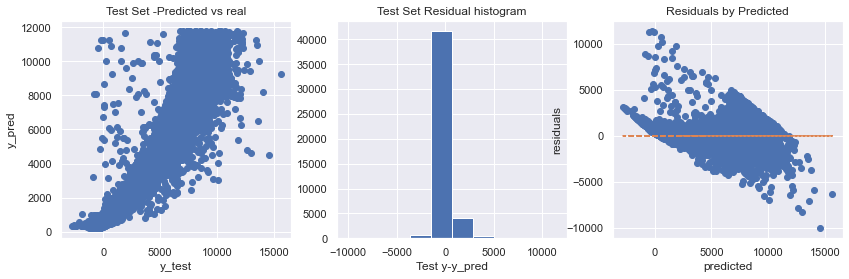

In [2883]:

# scatter plot of y_pred vs y

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_num_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")


# Get a histogram of Test y - y_pred.

ax[1].hist(residual)                             ## residual = (y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")


# scatter plot of residuals by predicted

ax[2].plot(y_pred,residual,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')



### Seaborn Residual Plot 

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

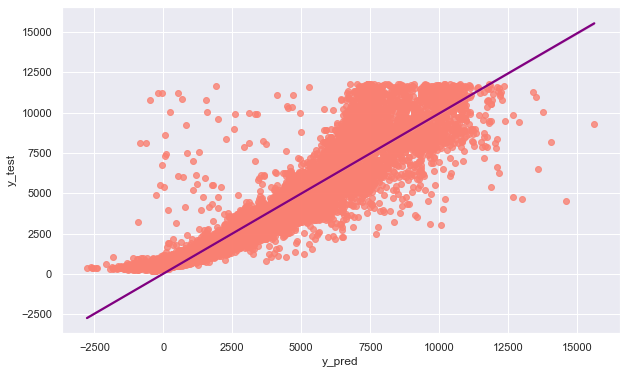

In [2884]:
plt.figure(figsize=(10,6))
        
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "salmon"}, line_kws={"color": "purple"})

### Calculating MSE and MAE

MSE: Mean Squared Error

MAE: Mean Absolute Error

In [2885]:
# Predictions on the test set

print(mse(y_num_test,y_pred))
print(mae(y_num_test,y_pred))
print(np.sqrt(mse(y_num_test,y_pred))) 

533204.8593666129
440.77235223747675
730.2087779304031


In [2886]:
# Prediction on the train set

mse(y_num_train,y_pred_train)

542314.5958184694

In [2887]:
mae(y_num_train,y_pred_train)

444.8019101707272

In [2888]:
## if the errors in train and test sets are similar the models are ok.

### Features Importance

In [2889]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

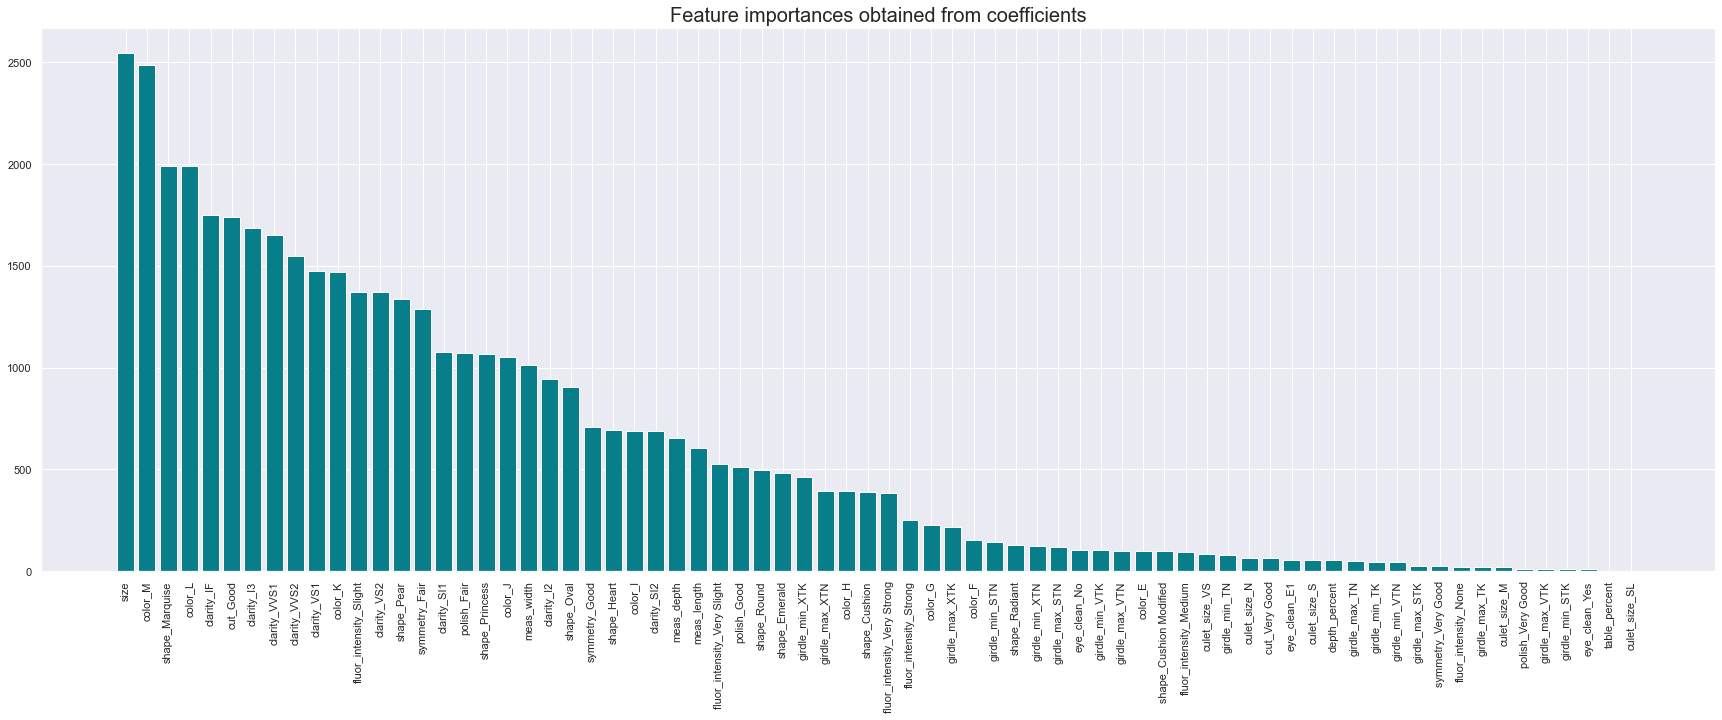

In [2890]:
plt.figure(figsize=(30,10))                              # this one I add to make it smaller
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [2891]:
diamonds.to_csv('diamonds_edited.csv')

In [2892]:
diamonds3=pd.read_csv('diamonds.csv')
diamonds3


,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,M,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
1,131704776,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
2,131584417,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,TN,M,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
3,131584416,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,STK,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
4,131613644,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,135619262,Round,10.65,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,M,STK,N,NaN,NaN,None,GIA,1210692,NaN,2022-02-24
219700,135122237,Radiant,5.17,NaN,Green,NaN,None,Fancy Light,VS2,NaN,...,TK,XTK,NaN,NaN,NaN,None,GIA,1292500,NaN,2022-02-24
219701,135553116,Round,18.07,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,TN,M,N,NaN,NaN,None,GIA,1315496,NaN,2022-02-24
219702,114752541,Princess,0.90,NaN,Red,NaN,NaN,Fancy,SI2,NaN,...,XTN,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN,2022-02-24


In [2894]:
diamonds3['lab'].to_csv('diamonds_lab.csv')